## Waves 7 dataset (updated)

In [1]:
#import libraries and updated dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
pd.set_option('display.max_columns', 150)

pwd = os.getcwd()
df = pd.read_csv(pwd+'/WVS_Cross-National_Wave_7_csv_v5_0.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\vitor\\Thesis_data/WVS_Cross-National_Wave_7_csv_v5_0.csv'

In [4]:
#dataframe shape (rows and columns)
df.shape

(94278, 606)

In [5]:
# Selecting the variables in the dataset

df1 = df[['A_YEAR', 'B_COUNTRY','H_URBRURAL','W_WEIGHT','S018', 'Q46', 'Q47', 'Q49', 'Q251', 'Q260','Q262', 'Q273', 'Q279', 'Q288R']]
df1.head()

,A_YEAR,B_COUNTRY,H_URBRURAL,W_WEIGHT,S018,Q46,Q47,Q49,Q251,Q260,Q262,Q273,Q279,Q288R
0,2018,20,1,1.0,0.996016,1,3,10,8,2,60,1,1,2
1,2018,20,1,1.0,0.996016,1,1,9,6,1,47,2,1,3
2,2018,20,1,1.0,0.996016,2,1,9,8,1,48,4,1,2
3,2018,20,1,1.0,0.996016,2,2,8,6,2,62,2,1,2
4,2018,20,1,1.0,0.996016,2,2,7,8,1,49,2,1,2


In [6]:
df1.dtypes

A_YEAR          int64
B_COUNTRY       int64
H_URBRURAL      int64
W_WEIGHT      float64
S018          float64
Q46             int64
Q47             int64
Q49             int64
Q251            int64
Q260            int64
Q262            int64
Q273            int64
Q279            int64
Q288R           int64
dtype: object

In [7]:
df1['A_YEAR'].value_counts()

2018    40647
2020    21187
2022     9797
2017     9722
2019     7007
2021     5918
Name: A_YEAR, dtype: int64

In [8]:
pd.options.display.max_rows=100
df1['B_COUNTRY'].value_counts()


124    4018
360    3200
156    3036
826    2609
840    2596
792    2415
528    2145
344    2075
68     2067
702    2012
586    1995
36     1813
643    1810
76     1762
484    1741
496    1638
276    1528
170    1520
764    1500
364    1499
604    1400
392    1353
458    1313
804    1289
398    1276
404    1266
642    1257
410    1245
566    1237
231    1230
320    1229
51     1223
158    1223
716    1215
788    1208
400    1203
703    1200
608    1200
704    1200
762    1200
417    1200
558    1200
368    1200
50     1200
104    1200
203    1200
218    1200
300    1200
818    1200
422    1200
504    1200
434    1196
862    1190
630    1127
554    1057
688    1046
462    1039
446    1023
20     1004
32     1003
196    1000
858    1000
152    1000
909     447
Name: B_COUNTRY, dtype: int64

In [9]:
#We can see that the dataset has data about Germany, specifically 1528 answers
len(df1[df1['B_COUNTRY']==528])

2145

### Data Cleaning

In [10]:
# Removing NaN and missing values
df1 = df1.drop(df1[df1['H_URBRURAL'] == -5].index)
df1 = df1.drop(df1[df1['Q47'] == -1].index | df1[df1['Q47'] == -2].index | df1[df1['Q47'] == -5].index)
df1 = df1.drop(df1[df1['Q46'] == -1].index | df1[df1['Q46'] == -2].index | df1[df1['Q46'] == -5].index)
df1 = df1.drop(df1[df1['Q49'] == -1].index | df1[df1['Q49'] == -2].index | df1[df1['Q49'] == -5].index)
df1 = df1.drop(df1[df1['Q262'] == -1].index |df1[df1['Q262'] == -2].index | df1[df1['Q262'] == -4].index | df1[df1['Q262'] == -5].index)
df1 = df1.drop(df1[df1['Q273'] == -1].index |df1[df1['Q273'] == -2].index | df1[df1['Q273'] == -5].index)
df1 = df1.drop(df1[df1['Q279'] == -1].index |df1[df1['Q279'] == -2].index | df1[df1['Q279'] == -5].index)
df1 = df1.drop(df1[df1['Q288R'] == -1].index |df1[df1['Q288R'] == -2].index | df1[df1['Q288R'] == -5].index)
df1 = df1.drop(df1[df1['Q251'] == -1].index |df1[df1['Q251'] == -2].index | df1[df1['Q251'] == -5].index)
df1 = df1.drop(df1[df1['Q260'] == -5].index | df1[df1['Q260']== -2].index)

C:\Users\vitor\AppData\Local\Temp\ipykernel_18600\1068636613.py:3: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df1 = df1.drop(df1[df1['Q47'] == -1].index | df1[df1['Q47'] == -2].index | df1[df1['Q47'] == -5].index)
C:\Users\vitor\AppData\Local\Temp\ipykernel_18600\1068636613.py:4: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df1 = df1.drop(df1[df1['Q46'] == -1].index | df1[df1['Q46'] == -2].index | df1[df1['Q46'] == -5].index)
C:\Users\vitor\AppData\Local\Temp\ipykernel_18600\1068636613.py:5: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df1 = df1.drop(df1[df1['Q49'] == -1].index | df1[df1['Q49

### Count the values per column (The variables names and answers are in the Drive Folder in the WVS Dictionary)

In [11]:
df1['B_COUNTRY'].value_counts()

124    4018
360    3081
156    2795
840    2488
792    2276
344    2029
826    1962
68     1929
702    1912
586    1813
496    1638
36     1627
484    1625
643    1565
170    1520
76     1506
528    1495
764    1457
276    1439
364    1433
604    1349
458    1313
410    1245
158    1221
231    1209
558    1200
504    1200
50     1200
104    1200
704    1200
762    1200
608    1199
566    1199
404    1192
716    1192
422    1188
862    1187
203    1172
703    1164
400    1162
218    1157
368    1156
320    1142
788    1141
51     1140
417    1136
300    1115
804    1094
630    1065
398    1065
392    1032
434    1017
642    1001
462     993
818     974
688     927
858     918
196     900
32      881
20      875
152     841
554     821
446     796
909     338
Name: B_COUNTRY, dtype: int64

In [12]:
df1['H_URBRURAL'].value_counts()

1    59777
2    27548
Name: H_URBRURAL, dtype: int64

In [13]:
df1['W_WEIGHT'].value_counts()

1.000000    42955
0.734895     1003
0.341669      487
1.479793      479
1.222222      448
            ...  
0.785325        1
0.691725        1
1.237643        1
3.160601        1
5.891653        1
Name: W_WEIGHT, Length: 11074, dtype: int64

In [14]:
df1['S018'].value_counts()

0.833333    17461
0.248880     4018
0.312500     3081
0.329381     2795
1.000000     2659
0.385208     2488
0.817662     2361
0.414079     2276
0.481928     2029
0.383289     1962
0.483793     1929
0.497018     1912
0.500000     1813
0.610501     1638
0.551572     1627
0.574383     1625
0.552486     1565
0.657895     1520
0.567537     1506
0.466201     1495
0.666667     1457
0.654450     1439
0.667111     1433
0.714286     1349
0.761615     1313
0.803213     1245
0.813008     1209
0.808407     1199
0.789889     1192
0.823045     1192
0.840336     1187
0.831255     1162
0.813670     1142
0.827815     1141
0.775795     1094
0.887311     1065
0.783085     1065
0.739098     1032
0.836120     1017
0.795545     1001
0.962464      993
0.829187      927
0.997009      881
0.996016      875
0.946074      821
0.977517      796
2.237137      338
Name: S018, dtype: int64

In [15]:
df1['Q46'].value_counts()

2    47784
1    26922
3    10712
4     1907
Name: Q46, dtype: int64

In [16]:
df1['Q47'].value_counts()

2    38956
3    23836
1    19141
4     4422
5      970
Name: Q47, dtype: int64

In [17]:
df1['Q49'].value_counts()

8     18004
7     14941
10    14529
5     10275
6      9957
9      9191
4      4034
3      2806
1      2354
2      1234
Name: Q49, dtype: int64

In [18]:
df1['Q262'].value_counts()


30     2359
35     2247
40     2146
25     2123
28     2009
45     2005
32     1964
38     1925
24     1912
33     1838
22     1804
20     1792
26     1790
36     1789
55     1780
29     1779
34     1772
27     1726
50     1720
23     1704
19     1677
37     1669
31     1661
18     1643
42     1642
21     1626
39     1565
48     1565
43     1516
46     1509
41     1486
44     1483
47     1476
60     1468
52     1466
49     1433
53     1425
56     1370
54     1357
58     1334
65     1250
57     1204
51     1202
62     1152
59     1134
63     1113
64     1080
61     1056
66      967
68      892
67      874
70      862
69      757
71      569
72      555
73      507
74      439
75      405
77      373
76      361
78      308
79      273
80      271
82      197
81      193
84      134
83      132
85      103
17       84
86       74
87       46
88       42
89       39
16       28
91       25
90       24
92       13
93       10
99        7
94        7
95        4
98        1
96        1
100 

In [19]:
df1['Q273'].value_counts()

1    48836
6    20765
2     7119
5     4782
3     3894
4     1929
Name: Q273, dtype: int64

In [20]:
df1['Q279'].value_counts()

1    32193
3    12818
5    11577
4    10878
2     7345
7     6645
6     4876
8      993
Name: Q279, dtype: int64

In [21]:
df1['Q288R'].value_counts()

2    57201
1    21442
3     8682
Name: Q288R, dtype: int64

In [22]:
df1['Q251'].value_counts()

8     13095
5     13092
7     12792
6     10827
10    10494
1      7559
9      6429
4      5454
3      4655
2      2928
Name: Q251, dtype: int64

In [23]:
df1['Q260'].value_counts()

 2    45649
 1    41674
-1        2
Name: Q260, dtype: int64

In [24]:
df2 = df1.rename(columns={'A_YEAR': 'Ano','B_COUNTRY': 'País', 'H_URBRURAL': 'UrbRural', 
'W_WEIGHT': 'W_WEIGHT', 'S018':'S018', 'Q46':'BemEstarSub', 'Q47':'Saúde', 'Q49': 'SatisfaçaoVida', 'Q260': 'Gênero', 
'Q262':'Idade', 'Q273': 'EstadoCivil', 'Q279': 'Emprego', 'Q288R': 'Renda', 'Q251': 'Democracia'})

### Transposed the values to be able to apply a Logisitic regression after the dataset is ready

In [25]:
invert1 = {4:1,3:2,2:3,1:4}
df2['BemEstarSub'] = df2['BemEstarSub'].replace(to_replace=invert1)

In [26]:
df2['BemEstarSub'].value_counts()

3    47784
4    26922
2    10712
1     1907
Name: BemEstarSub, dtype: int64

### Applying a transformation to convert numerical data to categorical, in other words, get the dummies from the columns

In [27]:
trans1 = {1:'Casado',2:'Vivendo_juntos', 3:'Separado', 4:'Separado',5:'Viúvo',6:'Solteiro'}
df2['EstadoCivil_cat'] = df2['EstadoCivil'].replace(to_replace=trans1)

In [28]:
df2['EstadoCivil_cat'].value_counts()

Casado            48836
Solteiro          20765
Vivendo_juntos     7119
Separado           5823
Viúvo              4782
Name: EstadoCivil_cat, dtype: int64

In [29]:
trans2 = {5:'Muito_ruim', 4:'Ruim', 3:'Razoável', 2:'Boa', 1:'Muito_boa'}
df2['Saúde_cat'] = df2['Saúde'].replace(to_replace=trans2)

In [30]:
trans5 = {1:'Homem', 2:'Mulher'}
df2['Gênero_cat'] = df2['Gênero'].replace(to_replace=trans5)

In [31]:
trans7 = {1:'tempo_integral', 2:'Meio_periodo', 3:'Autônomo', 4:'Aposentado', 5:'Dona_de_casa', 6:'Estudante', 7:'Desempregado', 8:'Outros_status'}
df2['Emprego_cat'] = df2['Emprego'].replace(to_replace=trans7)

In [32]:
df2['Emprego_cat'].value_counts()

tempo_integral    32193
Autônomo          12818
Dona_de_casa      11577
Aposentado        10878
Meio_periodo       7345
Desempregado       6645
Estudante          4876
Outros_status       993
Name: Emprego_cat, dtype: int64

In [33]:
trans8 = {1:'Baixa_renda', 2:'Média_renda', 3:'Alta_renda'}
df2['Renda_cat'] = df2['Renda'].replace(to_replace=trans8)

In [34]:
trans10 = {1:'Urbano', 2:'Rural'}
df2['UrbRural_cat'] = df2['UrbRural'].replace(to_replace=trans10)

In [35]:
df2["País"].unique()

array([ 20,  32,  36,  50,  51,  68,  76, 104, 124, 152, 156, 158, 170,
       196, 203, 218, 231, 276, 300, 320, 344, 360, 364, 368, 392, 398,
       400, 404, 410, 417, 422, 434, 446, 458, 462, 484, 496, 504, 528,
       554, 558, 566, 586, 604, 608, 630, 642, 643, 688, 702, 703, 704,
       716, 762, 764, 788, 792, 804, 818, 826, 840, 858, 862, 909],
      dtype=int64)

In [36]:
trans12 = {124:'Canada', 156:'China', 360:'Indonesia', 344:'Hong_Kong', 68:'Bolivia', 586:'Pakistan', 170:'Colombia', 
36:'Australia', 364:'Iran', 643: 'Russian Federation', 76: 'Brazil', 484: 'Mexico', 604:'Peru', 458: 'Malaysia', 
608:'Philippines', 50:'Bangladesh', 558:'Nicaragua', 716:'Zimbabwe', 764:'Thailand', 231:'Ethiopia', 566: 'Nigeria', 
762: 'Tajikistan', 417: 'Kyrgyztan', 300:'Greece', 840: 'United_States', 788: 'Tunisia', 158: 'Taiwan', 
630: 'Puerto_Rico', 104: 'Myanmar', 398: 'Kazakhstan', 320: 'Guatemala', 804: 'Ukraine', 410: 'Republic_of_Korea', 
688:'Serbia', 642:'Romania',  20:'Andorra', 218: 'Ecuador', 32: 'Argentina', 152:'Chile', 196: 'Cyprus', 446: 'Macao',
368: 'Iraq', 276:'Germany', 51:'Armenia', 203:"Czechia", 392:'Japan', 400: 'Jordan', 404:"Kenya",422:'Lebanon',
434: "Lybia", 462:"Maldives", 496:"Mongolia", 504: "Morocco", 528:"Netherlands", 554:"New_Zealand", 702: "Singapore",
703:'Slovakia', 704:"Viet_Nam", 792: "Türkiye", 818:"Egypt", 826: "United_Kingdom", 858: "Uruguay", 862: "Venezuela",

  }

df2['País_cat'] = df2['País'].replace(to_replace=trans12)


In [37]:
df2 = df2.drop(df2[df2['País_cat']== 909].index)
df2['País_cat'].value_counts()

Canada                4018
Indonesia             3081
China                 2795
United_States         2488
Türkiye               2276
Hong_Kong             2029
United_Kingdom        1962
Bolivia               1929
Singapore             1912
Pakistan              1813
Mongolia              1638
Australia             1627
Mexico                1625
Russian Federation    1565
Colombia              1520
Brazil                1506
Netherlands           1495
Thailand              1457
Germany               1439
Iran                  1433
Peru                  1349
Malaysia              1313
Republic_of_Korea     1245
Taiwan                1221
Ethiopia              1209
Nicaragua             1200
Tajikistan            1200
Morocco               1200
Viet_Nam              1200
Myanmar               1200
Bangladesh            1200
Nigeria               1199
Philippines           1199
Kenya                 1192
Zimbabwe              1192
Lebanon               1188
Venezuela             1187
C

### GINI Index to the main dataframe

In [38]:
gini_index = pd.read_csv(pwd+'/Gini_index.csv', skiprows=[0,1,2,3])
gini_index.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN,NaN


In [39]:
#Selecting only the countries names and 2018 as the year for the analyses
gini_index_18 = gini_index.loc[:,['Country Name','2018']]
gini_index_18.rename(columns={'Country Name':"País_cat", "2018": 'Gini_2018'}, inplace=True)
gini_index_18.head()

,País_cat,Gini_2018
0,Aruba,NaN
1,Africa Eastern and Southern,NaN
2,Afghanistan,NaN
3,Africa Western and Central,NaN
4,Angola,51.3


In [40]:
df2_merged_gini = pd.merge(df2,gini_index_18, on = 'País_cat')

df2_merged_gini.head()

,Ano,País,UrbRural,W_WEIGHT,S018,BemEstarSub,Saúde,SatisfaçaoVida,Democracia,Gênero,Idade,EstadoCivil,Emprego,Renda,EstadoCivil_cat,Saúde_cat,Gênero_cat,Emprego_cat,Renda_cat,UrbRural_cat,País_cat,Gini_2018
0,2018,20,1,1.0,0.996016,4,3,10,8,2,60,1,1,2,Casado,Razoável,Mulher,tempo_integral,Média_renda,Urbano,Andorra,NaN
1,2018,20,1,1.0,0.996016,4,1,9,6,1,47,2,1,3,Vivendo_juntos,Muito_boa,Homem,tempo_integral,Alta_renda,Urbano,Andorra,NaN
2,2018,20,1,1.0,0.996016,3,1,9,8,1,48,4,1,2,Separado,Muito_boa,Homem,tempo_integral,Média_renda,Urbano,Andorra,NaN
3,2018,20,1,1.0,0.996016,3,2,8,6,2,62,2,1,2,Vivendo_juntos,Boa,Mulher,tempo_integral,Média_renda,Urbano,Andorra,NaN
4,2018,20,1,1.0,0.996016,3,2,7,8,1,49,2,1,2,Vivendo_juntos,Boa,Homem,tempo_integral,Média_renda,Urbano,Andorra,NaN


In [41]:
df2_merged_gini.tail()

,Ano,País,UrbRural,W_WEIGHT,S018,BemEstarSub,Saúde,SatisfaçaoVida,Democracia,Gênero,Idade,EstadoCivil,Emprego,Renda,EstadoCivil_cat,Saúde_cat,Gênero_cat,Emprego_cat,Renda_cat,UrbRural_cat,País_cat,Gini_2018
64968,2022,858,1,0.206992,1.0,3,1,10,10,2,32,6,7,2,Solteiro,Muito_boa,Mulher,Desempregado,Média_renda,Urbano,Uruguay,39.7
64969,2022,858,1,0.191106,1.0,3,2,7,5,2,73,5,4,2,Viúvo,Boa,Mulher,Aposentado,Média_renda,Urbano,Uruguay,39.7
64970,2022,858,1,0.171931,1.0,4,2,9,9,1,67,5,4,2,Viúvo,Boa,Homem,Aposentado,Média_renda,Urbano,Uruguay,39.7
64971,2022,858,1,0.170917,1.0,3,3,7,7,1,45,1,7,2,Casado,Razoável,Homem,Desempregado,Média_renda,Urbano,Uruguay,39.7
64972,2022,858,1,0.103204,1.0,3,3,7,4,2,55,2,7,2,Vivendo_juntos,Razoável,Mulher,Desempregado,Média_renda,Urbano,Uruguay,39.7


In [42]:
#Putting the names in the Well-being
df2_merged_gini['BemEstarSub_cat'] = df2_merged_gini['BemEstarSub'].replace({4:'Muito feliz',3:"Feliz",2:"Pouco feliz",1:"infeliz"})

In [43]:
df2_merged_gini.head()

,Ano,País,UrbRural,W_WEIGHT,S018,BemEstarSub,Saúde,SatisfaçaoVida,Democracia,Gênero,Idade,EstadoCivil,Emprego,Renda,EstadoCivil_cat,Saúde_cat,Gênero_cat,Emprego_cat,Renda_cat,UrbRural_cat,País_cat,Gini_2018,BemEstarSub_cat
0,2018,20,1,1.0,0.996016,4,3,10,8,2,60,1,1,2,Casado,Razoável,Mulher,tempo_integral,Média_renda,Urbano,Andorra,NaN,Muito feliz
1,2018,20,1,1.0,0.996016,4,1,9,6,1,47,2,1,3,Vivendo_juntos,Muito_boa,Homem,tempo_integral,Alta_renda,Urbano,Andorra,NaN,Muito feliz
2,2018,20,1,1.0,0.996016,3,1,9,8,1,48,4,1,2,Separado,Muito_boa,Homem,tempo_integral,Média_renda,Urbano,Andorra,NaN,Feliz
3,2018,20,1,1.0,0.996016,3,2,8,6,2,62,2,1,2,Vivendo_juntos,Boa,Mulher,tempo_integral,Média_renda,Urbano,Andorra,NaN,Feliz
4,2018,20,1,1.0,0.996016,3,2,7,8,1,49,2,1,2,Vivendo_juntos,Boa,Homem,tempo_integral,Média_renda,Urbano,Andorra,NaN,Feliz


In [44]:
df.shape

(94278, 606)

<AxesSubplot: xlabel='SatisfaçaoVida', ylabel='Count'>

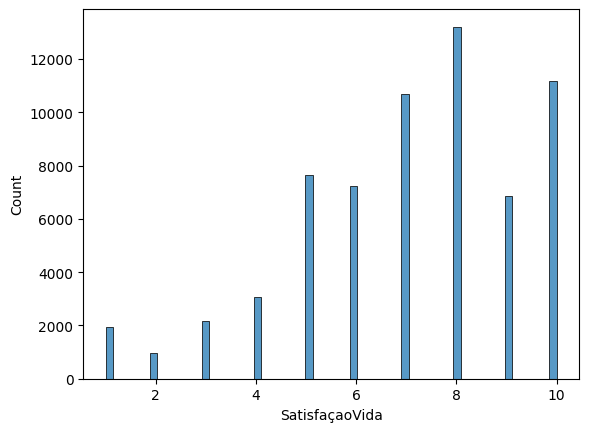

In [45]:
sns.histplot(data =df2_merged_gini, x = 'SatisfaçaoVida')

# I think will be better to the analysis if we used Satisfaction with live than the other question, 
#because this one is numerical and we will not lost so much information as the other question. Furthermore, 
#is possible to do a linear regression than a Logistic regression

In [46]:
df2_merged_gini.shape

(64973, 23)

### Economic Complexity Index

In [ ]:
#Getting the data from the API
url = 'https://oec.world/olap-proxy/data.jsonrecords?cube=complexity_eci_a_hs96_hs6&drilldowns=Country,ECI+Rank,Year&measures=ECI&parents=true&sparse=false'
r= requests.get(url)
r

In [ ]:
json = r.json()
json

In [ ]:
#Checking the keys of the json file
json.keys()

In [ ]:
#Checking the type
type(json['data'])

In [ ]:
# converting to dataframe
df_eci = pd.DataFrame(json['data'])
df_eci.head()

In [52]:
#Filtering the columns

df_eci = df_eci.drop(df_eci[df_eci['Year']!=2020].index)
df_eci = df_eci.drop(df_eci[["Continent ID", 'Continent', 'Country ID','ECI Rank', "Year"]],axis=1)
df_eci.rename(columns={'Country':"País_cat", "ECI": 'ECI_2020'}, inplace=True)

df_eci.head()

,País_cat,ECI_2020
10,Angola,-1.287359
34,Burkina Faso,-1.671066
50,Botswana,-0.577632
71,Cote d'Ivoire,-1.172989
100,Cameroon,-1.371698


In [53]:
#Join the df_eci with the main dataset
df_merged = pd.merge(df2_merged_gini,df_eci, on = 'País_cat')
df_merged.head()

,Ano,País,UrbRural,W_WEIGHT,S018,BemEstarSub,Saúde,SatisfaçaoVida,Democracia,Gênero,Idade,EstadoCivil,Emprego,Renda,EstadoCivil_cat,Saúde_cat,Gênero_cat,Emprego_cat,Renda_cat,UrbRural_cat,País_cat,Gini_2018,BemEstarSub_cat,ECI_2020
0,2017,32,1,0.302915,0.997009,3,3,6,6,1,50,5,1,2,Viúvo,Razoável,Homem,tempo_integral,Média_renda,Urbano,Argentina,41.3,Feliz,0.087104
1,2017,32,1,0.262318,0.997009,3,1,7,10,2,34,6,1,1,Solteiro,Muito_boa,Mulher,tempo_integral,Baixa_renda,Urbano,Argentina,41.3,Feliz,0.087104
2,2017,32,1,0.273054,0.997009,4,3,10,6,2,71,1,4,2,Casado,Razoável,Mulher,Aposentado,Média_renda,Urbano,Argentina,41.3,Muito feliz,0.087104
3,2017,32,1,0.262318,0.997009,4,1,9,7,2,37,4,3,2,Separado,Muito_boa,Mulher,Autônomo,Média_renda,Urbano,Argentina,41.3,Muito feliz,0.087104
4,2017,32,1,0.509190,0.997009,2,3,8,10,2,58,1,4,2,Casado,Razoável,Mulher,Aposentado,Média_renda,Urbano,Argentina,41.3,Pouco feliz,0.087104


# Getting the dummies from the columns

In [93]:
df3 = pd.get_dummies(data=df_merged, prefix='', prefix_sep='', columns= ['EstadoCivil_cat', 'Saúde_cat','Gênero_cat','Renda_cat','UrbRural_cat','Emprego_cat'])
df3.head()

,Ano,País,UrbRural,W_WEIGHT,S018,BemEstarSub,Saúde,SatisfaçaoVida,Democracia,Gênero,Idade,EstadoCivil,Emprego,Renda,País_cat,Gini_2018,BemEstarSub_cat,ECI_2020,Casado,Separado,Solteiro,Vivendo_juntos,Viúvo,Boa,Muito_boa,Muito_ruim,Razoável,Ruim,-1,Homem,Mulher,Alta_renda,Baixa_renda,Média_renda,Rural,Urbano,Aposentado,Autônomo,Desempregado,Dona_de_casa,Estudante,Meio_periodo,Outros_status,tempo_integral
0,2017,32,1,0.302915,0.997009,3,3,6,6,1,50,5,1,2,Argentina,41.3,Feliz,0.087104,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,2017,32,1,0.262318,0.997009,3,1,7,10,2,34,6,1,1,Argentina,41.3,Feliz,0.087104,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
2,2017,32,1,0.273054,0.997009,4,3,10,6,2,71,1,4,2,Argentina,41.3,Muito feliz,0.087104,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0
3,2017,32,1,0.262318,0.997009,4,1,9,7,2,37,4,3,2,Argentina,41.3,Muito feliz,0.087104,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
4,2017,32,1,0.509190,0.997009,2,3,8,10,2,58,1,4,2,Argentina,41.3,Pouco feliz,0.087104,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0


In [94]:
#Getting the columns
df3 = df3.loc[:,['W_WEIGHT','S018','BemEstarSub', 'SatisfaçaoVida','Democracia','Gênero', 'Idade', 'País_cat',
'Gini_2018','BemEstarSub_cat','ECI_2020','Casado','Separado','Solteiro','Vivendo_juntos','Viúvo','Boa','Muito_boa',
'Muito_ruim','Razoável','Ruim','Homem',	'Mulher',	'Alta_renda', 'Baixa_renda','Média_renda','Rural','Urbano', 'Desempregado']]

In [96]:
df3.head()

,W_WEIGHT,S018,BemEstarSub,SatisfaçaoVida,Democracia,Gênero,Idade,País_cat,Gini_2018,BemEstarSub_cat,ECI_2020,Casado,Separado,Solteiro,Vivendo_juntos,Viúvo,Boa,Muito_boa,Muito_ruim,Razoável,Ruim,Homem,Mulher,Alta_renda,Baixa_renda,Média_renda,Rural,Urbano,Desempregado
0,0.302915,0.997009,3,6,6,1,50,Argentina,41.3,Feliz,0.087104,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0.262318,0.997009,3,7,10,2,34,Argentina,41.3,Feliz,0.087104,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,0.273054,0.997009,4,10,6,2,71,Argentina,41.3,Muito feliz,0.087104,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
3,0.262318,0.997009,4,9,7,2,37,Argentina,41.3,Muito feliz,0.087104,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.509190,0.997009,2,8,10,2,58,Argentina,41.3,Pouco feliz,0.087104,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [98]:
# Creating the variable Age^2
df3['Idade_2'] = df3['Idade']*df3['Idade']

In [99]:
df3.shape

(58240, 30)

In [100]:
df3.head()

,W_WEIGHT,S018,BemEstarSub,SatisfaçaoVida,Democracia,Gênero,Idade,País_cat,Gini_2018,BemEstarSub_cat,ECI_2020,Casado,Separado,Solteiro,Vivendo_juntos,Viúvo,Boa,Muito_boa,Muito_ruim,Razoável,Ruim,Homem,Mulher,Alta_renda,Baixa_renda,Média_renda,Rural,Urbano,Desempregado,Idade_2
0,0.302915,0.997009,3,6,6,1,50,Argentina,41.3,Feliz,0.087104,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,2500
1,0.262318,0.997009,3,7,10,2,34,Argentina,41.3,Feliz,0.087104,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1156
2,0.273054,0.997009,4,10,6,2,71,Argentina,41.3,Muito feliz,0.087104,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,5041
3,0.262318,0.997009,4,9,7,2,37,Argentina,41.3,Muito feliz,0.087104,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1369
4,0.509190,0.997009,2,8,10,2,58,Argentina,41.3,Pouco feliz,0.087104,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,3364


### Exporting final dataset to .csv

In [101]:
df3.to_csv("Dataframe.csv")

## Assigning class to each country (NOT DONE)


In [ ]:
#Criando 3 classes para países com base no criterio do banco mundial

#df2['Classe_país']=df2['País_cat']

#Classe = {'Canadá': 'Desenvolvido' ,'China': 'Emergente' , 'Indonésia':'Emergente','Hong_Kong':'Desenvolvido', 'Bolívia':'Emergente', 'Paquistão':'Emergente', 'Colômbia':'Emergente','Austrália':'Desenvolvido', 'Irã':'Emergente', 
#'Rússia':'Emergente' ,'Brasil': 'Emergente' ,'México': 'Emergente','Peru': 'Emergente','Malásia': 'Emergente', 'Filipinas': 'Emergente','Bangladesh': 'Emergente','Nicarágua':'Emergente', 'Zimbábue':'Emergente', 
#'Tailândia':'Emergente','Etiópia':'Pobre', 'Nigéria': 'Emergente', 'Tajiquistão':'Emergente', 'Quirguistão':'Emergente', 'Grécia':'Desenvolvido','Estados_Unidos':'Desenvolvido','Tunísia': 'Emergente', 'Taiwan': 'Desenvolvido', 
#'Porto_Rico':'Desenvolvido','Myanmar':'Emergente', 'Cazaquistão': 'Emergente', 'Guatemala':'Emergente' ,'Ucrânia': 'Emergente','Coreia_do_Sul': 'Desenvolvido', 'Sérvia': 'Emergente','Romênia': 'Emergente', 'Andorra': 'Desenvolvido', 
#'Equador': 'Emergente', 'Argentina': 'Emergente', 'Chile': 'Desenvolvido', 'Chipre': 'Desenvolvido', 'Macau':'Desenvolvido', 'Iraque': 'Emergente' }


#df2['Classe_país'] = df2['Classe_país'].replace(to_replace=Classe)
#df2.head()

In [107]:
#df_emergente = df_final.loc[df_final['Emergente']== 1]
#df_emergente.head()